In [1]:
import torch
import numpy as np
from tv import prox_tv_iso
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from matplotlib import pyplot as plt
import math

In [2]:
# just to compute psnr in pytorch

def compute_PSNR(img, imclean, data_range=1):
    Img = img.data.cpu().numpy().astype(np.float32)
    Iclean = imclean.data.cpu().numpy().astype(np.float32)
    PSNR = compare_psnr(Iclean[0,:,:,:], Img[0,:,:,:], data_range=data_range)
    return PSNR
    

In [3]:
device = 'cpu'
image = np.load('img_clean.npy')
noisy_im =  np.load('img_noisy.npy')

x = torch.from_numpy(image)[np.newaxis, np.newaxis, :, :].to(device).float() # ground truth
y = torch.from_numpy(noisy_im)[np.newaxis, np.newaxis, :, :].to(device).float() # noisy measrements

The eval method of the prox_tv_iso returns the solution 

\begin{equation}
    \text{denoised} = \argmin_{x} \frac{1}{2} \lVert{x} - y \rVert^2 + \lambda \text{TV}(x)
\end{equation}

In [4]:
prox_tv = prox_tv_iso(device) # construct proximal operator of tv

denoised_tv = prox_tv.eval(y, niter=200, lmbda=0.08)  # you need to tune the lmbda and niter sufficient large such that the solution does not change

psnr_noisy = compute_PSNR(x, y)
psnr_tv = compute_PSNR(x, denoised_tv)

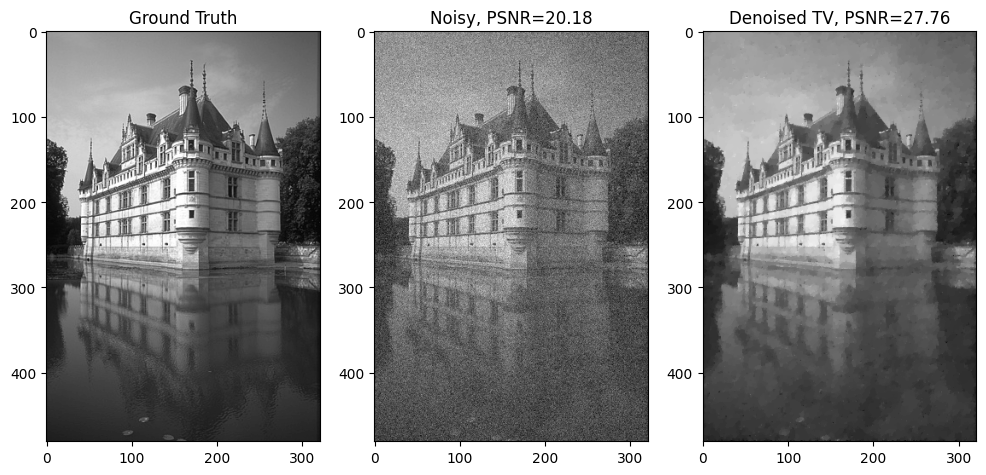

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(x[0, 0].detach().cpu().numpy(), cmap='gray')
plt.title('Ground Truth')
plt.subplot(132)
plt.imshow(y[0, 0].detach().cpu().numpy(), cmap='gray')
plt.title('Noisy, PSNR=' + str(np.round(psnr_noisy, 2)))
plt.subplot(133)
plt.imshow(denoised_tv[0, 0].detach().cpu().numpy(), cmap='gray')
plt.title('Denoised TV, PSNR=' + str(np.round(psnr_tv, 2)))
plt.show()

The solve any problem of form 

\begin{equation}
    \text{denoised} = \argmin_{x} \frac{1}{2} \lVert A {x} - y \rVert^2 + \lambda \text{TV}(x)
\end{equation}

you can use the following format with the correct replacement of A and its transpose AT. 

In [ ]:
max_iter = 5000
tol = 1e-6
lmbd = 7.25e-3 # you need to tune 
alpha =  # proper step size, Lipschitz constant of the ATA
tv_iter = 100

x = AT(y) # A transpose (AT) applied to Y
z = AT(y) # A transpose (AT) applied to Y
t = 1

with torch.no_grad():
    pbar = tqdm(range(max_iter), dynamic_ncols=True)
    for i in pbar:
        x_old = torch.clone(x)
        ATAx = # replace with yours (A is the forward and Ht is the transpose)
        x = torch.clip(z - alpha*(ATAx - AT(y)), 0., 1.)
        x = prox_tv(x.squeeze(), tv_iter, lmbd*alpha)

        t_old = t 
        t = 0.5 * (1 + math.sqrt(1 + 4*t**2))

        z = x + (t_old - 1)/t * (x - x_old)

        # relative change of norm for terminating
        res = (torch.norm(x_old - x)/torch.norm(x_old)).item()
        pbar.set_description(f"res: {res:.2e}")
        if res < tol:
            break

SyntaxError: invalid syntax (164318042.py, line 4)